In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Levantamos los datasets para hacer reportes de los datos.

In [4]:
#Levantamos los datasets en crudo (archivos .csv)
df_clientes     =pd.read_csv('../Datasets/Clientes.csv'   , encoding='latin-1', sep=';')
df_compras      =pd.read_csv('../Datasets/Compra.csv'     , encoding='latin-1', sep=',')
df_gastos       =pd.read_csv('../Datasets/Gasto.csv'      , encoding='latin-1', sep=',')
df_localidades  =pd.read_csv('../Datasets/Localidades.csv', encoding='latin-1', sep=',')
df_proveedores  =pd.read_csv('../Datasets/Proveedores.csv', encoding='latin-1', sep=',')
df_sucursales   =pd.read_csv('../Datasets/Sucursales.csv' , encoding='latin-1', sep=';')
df_ventas       =pd.read_csv('../Datasets/Venta.csv'      , encoding='latin-1', sep=',')

In [5]:
df_clientes.drop(columns='col10', inplace=True)

## Reporte de Datos por Dataset

In [6]:
datasets = [df_clientes, df_compras, df_gastos, df_localidades, df_proveedores, df_sucursales, df_ventas]
names = ['df_clientes', 'df_compras', 'df_gastos', 'df_localidades', 'df_proveedores', 'df_sucursales', 'df_ventas']

Creamos una columna auxiliar a fin de detectar nulos dentro de los registros.

In [7]:
diccionario = {False: 0, True: 1}

for df in datasets:
    tiene_null = df.isna().any(axis=1)
    df['es_null'] = tiene_null
    df['es_null'] = df.es_null.map(diccionario)

## Vemos gráficamente la calidad de los datos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


df_clientes


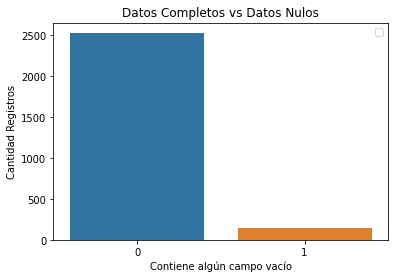

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


df_compras


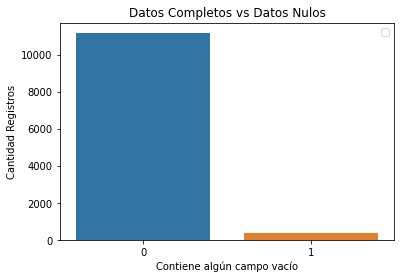

df_localidades


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


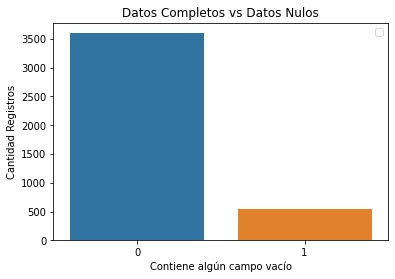

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


df_proveedores


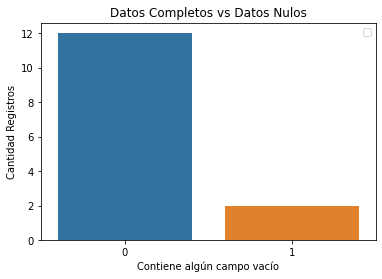

df_ventas


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


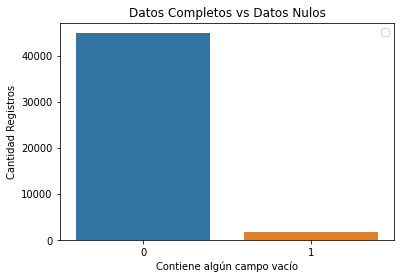

In [8]:
for i, df in enumerate(datasets):
    tiene_null = df.isna().sum().sum()
    if tiene_null > 0:
        print(names[i])
        sns.countplot(x="es_null", data=df)
        plt.title('Datos Completos vs Datos Nulos')
        plt.xlabel('Contiene algún campo vacío')
        plt.ylabel('Cantidad Registros')
        plt.legend()
        plt.show()

Podemos notar que la cantidad de registros con datos faltantes es relativamente baja con respecto a la cantidad de datos total dentro de los datasets.

## Detección de Outliers

Usaremos la **Regla de las Tres Sigmas** <br>
- mínimo = Promedio – 3 * Desviación Estándar
- máximo = Promedio + 3 * Desviación Estándar

df_compras -> Cantidad, Precio <br>
df_gastos  -> Monto <br>
df_ventas  -> Precio, Cantidad

**Compras** <br>
Una compra no debería tener cantidades ni precios negativos. Por otro lado, evaluaremos cúanto es un precio "normal" de compra para determinar el máximo.

In [39]:
promedio = df_compras['Precio'].mean()
std_dev = df_compras['Precio'].std()
minimo = 0
maximo = promedio + 3 * std_dev

Observamos que los outliers en el dataset de Compras se generan en el `precio`.

In [40]:
df_compras[(df_compras['Precio']<minimo) | (df_compras['Cantidad']<0)]

,IdCompra,Fecha,Fecha_AÃ±o,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor,es_null


In [41]:
df_compras[df_compras['Precio']>maximo]

,IdCompra,Fecha,Fecha_AÃ±o,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor,es_null
6507,6508,8/31/2018,2018,8,201808,42774,14,434491.0,9,0
6805,6806,10/26/2018,2018,1,201801,42773,2,577223.0,13,0
7414,7415,2/22/2019,2019,2,201902,42773,13,580886.0,6,0
7613,7614,4/26/2019,2019,4,201904,42917,33,10445800.0,11,0
8763,8764,11/29/2019,2019,1,201901,42779,17,688826.0,10,0
11272,11273,11/27/2020,2020,11,202011,42779,7,707004.0,8,0


**Gastos** <br>

In [42]:
promedio = df_gastos['Monto'].mean()
std_dev = df_gastos['Monto'].std()
minimo = 0
maximo = promedio + 3 * std_dev

No posee outliers

In [43]:
df_gastos[(df_gastos['Monto']<minimo) | (df_gastos['Monto']>maximo)]

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto,es_null


**Venta**<br>

In [44]:
#Precio
promedio = df_ventas['Precio'].mean()
std_dev = df_ventas['Precio'].std()
minimo = 0
maximo = promedio + 3 * std_dev

In [45]:
df_ventas[(df_ventas['Precio']<minimo) | (df_ventas['Precio']>maximo)]

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,es_null
4864,4865,2018-08-03,2018-08-08,3,1537,2,1079,42932,1560000.0,1.0,0
7027,7028,2016-10-15,2016-10-20,1,2944,15,1724,42773,870364.0,2.0,0
9143,9144,2017-02-01,2017-02-08,1,1469,3,1012,42987,4560000.0,1.0,0
10995,10996,2018-05-08,2018-05-11,1,2034,4,1360,42773,870364.0,2.0,0
16232,16233,2019-11-08,2019-11-16,2,1996,7,1966,42779,955504.0,3.0,0
16465,16466,2020-01-20,2020-01-24,3,2754,7,1966,42782,33739200.0,1.0,0
20904,20905,2015-07-15,2015-07-16,3,144,10,2351,42811,25599200.0,2.0,0
26679,26680,2016-11-08,2016-11-09,3,2620,18,3664,42779,955504.0,2.0,0
32359,32360,2018-10-02,2018-10-10,2,1766,24,3751,42779,955504.0,2.0,0
35878,35879,2016-09-27,2016-10-01,3,373,25,3110,42779,955504.0,1.0,0


In [48]:
#Cantidad
promedio = df_ventas['Cantidad'].mean()
std_dev = df_ventas['Cantidad'].std()
minimo = 0
maximo = int(promedio + 3 * std_dev)

Vemos que algunos registros son detectados cómo outliers, pero simplemente son casos atípicos de ventas con una cantidad por encima de la media. No nos preocupa.

In [50]:
df_ventas[(df_ventas['Cantidad']<minimo) | (df_ventas['Cantidad']>maximo)]

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,es_null
19,20,2019-10-21,2019-10-24,2,667,13,1674,42992,570.00,30.0,0
83,84,2015-02-07,2015-02-12,3,993,13,1674,42884,498.00,20.0,0
100,101,2017-06-17,2017-06-21,2,1043,13,1674,42883,498.00,20.0,0
154,155,2019-03-14,2019-03-21,1,974,13,1674,42938,2679.00,20.0,0
159,160,2019-07-09,2019-07-10,2,2689,13,1674,42920,789.00,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...
46161,47582,2020-11-30,2020-12-04,2,342,15,1011,42766,7011.62,20.0,0
46162,47583,2020-11-30,2020-12-07,1,126,3,1976,42969,3839.00,20.0,0
46190,47622,2020-12-01,2020-12-06,2,455,4,1360,42954,2554.00,20.0,0
46284,47760,2020-12-03,2020-12-06,2,2662,18,3859,42928,123.00,20.0,0
